# Jet Monte Carlo Exercises

1. Random Number Generator

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from random import random

In [353]:
def gen_uniform_histogram(N,lower_bound = 0,upper_bound = 1):
    """
    Generate histogram of N values drawn from uniform distribution in specified range
        INPUT: N - number of entries
               lower_bound - lower bound of distribution
               upper_bound - upper bound of distribution
               
        OUTPUT: None
    
    """
    values = [random()*(upper_bound - lower_bound)  + lower_bound for x in range(N)]
    plt.hist(values)
    
def gen_uniform_samples(N,lower_bound = 0,upper_bound = 1):
    """
    Generate set of N values drawn from uniform distribution in specified range
        INPUT: N - number of entries
               lower_bound - lower bound of distribution
               upper_bound - upper bound of distribution
               
        OUTPUT: None
    
    """
    values = [random()*(upper_bound - lower_bound)  + lower_bound for x in range(N)]
    return(values)

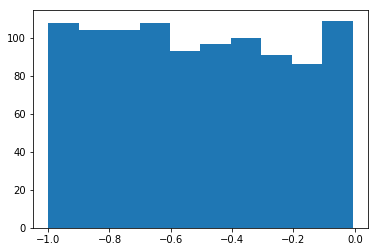

In [336]:
gen_uniform_histogram(1000,-1/exp(5),-1)

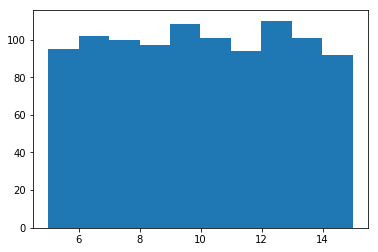

In [29]:
gen_uniform_histogram(1000,5,15)

2: Pi Calculation

In [119]:
def calculate_pi(N_darts):
    
    N_in_circle = 0
    
    throws = [(random() - .5,random() - .5) for throw in range(N_darts)]
    for dart in throws:
        x_position,y_position = dart
        if (x_position**2 + y_position**2)**.5 <= .5:
            N_in_circle += 1
    #print (4.0*N_in_circle/N_darts)        
    return 4.0*N_in_circle/N_darts
    

In [ ]:
pi_guesses = [calculate_pi(100000) for x in range(100000)]
plt.hist(pi_guesses)

In [196]:
.48**2 +.36**2

0.36

##### 3: Inverse transform Method

In [197]:
from math import exp,pi,sqrt

So, I'm gonna need to invert the CDF of the normal distribution... ill use a taylor expansion from wikipedia and then generate a random number x, and then search for $ y$ such that $CDF(y) = x$ numerically.

In [324]:
def normal_dist(x,mu,std):
    
    return (1.0/(std*sqrt(2*pi)))*exp((.5/std**2)*(-(x - mu)**2))

def Simpsons_method(f,lower,upper,mu,std,delta_x):
    integral = []
    total_area = 0
    i = 0
    
    x_vals = np.linspace(lower,upper,int((upper-lower)/delta_x))
    y_vals = [f(x,mu,std) for x in x_vals]
    #print(len(x_vals))
    #print(len(y_vals))
    plt.plot(x_vals,y_vals)
    
    while i < len(x_vals) - 7:
        y0,y1,y2,y3,y4,y5,y6 = y_vals[i:i+7]
        
        area = (delta_x/3)*(y0 + 4*(y1 + y3 + y5) + 2*(y2 + y4) + y6)
        total_area += area
        integral.append((x_vals[i+6],total_area))
        i+=6
    
    return integral
        
    
    


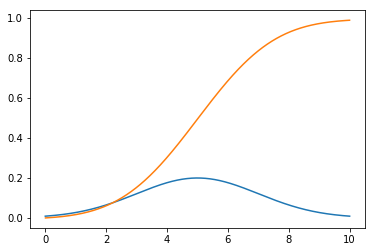

In [325]:
CDF = Simpsons_method(normal_dist,0,10,5,2,.001)
#print CDF
x,y = zip(*CDF)
#print(x,y)
plt.plot(x,y)



In [258]:
def find_inverse(f,x0,tol = .001):
    f.reverse
    for x,f_x in f:
        if abs(x0 - f_x) < tol:
            return x
    
    return "failed"
    
    
    
    
    
    

(array([0.02072927, 0.01122414, 0.01476328, 0.01526887, 0.01344874,
        0.01628006, 0.02042591, 0.02335834, 0.02072927, 0.02568407,
        0.02548183, 0.03013327, 0.0369082 , 0.0374138 , 0.04064958,
        0.04803123, 0.0522782 , 0.05248043, 0.05713188, 0.06117661,
        0.06289563, 0.07149069, 0.08595061, 0.07968127, 0.08605173,
        0.09788258, 0.0968714 , 0.11618501, 0.12174652, 0.11598277,
        0.12943151, 0.13711651, 0.12447671, 0.14358808, 0.15036301,
        0.14672275, 0.16077821, 0.16674419, 0.16654195, 0.18181083,
        0.17827168, 0.17958622, 0.18747346, 0.1921249 , 0.18777681,
        0.19849536, 0.19960766, 0.19030477, 0.20678706, 0.20840496,
        0.19637187, 0.21528101, 0.20800049, 0.19627075, 0.20294457,
        0.1998099 , 0.17908063, 0.19303497, 0.18595668, 0.17028333,
        0.18009182, 0.17018222, 0.15653124, 0.16320505, 0.15885696,
        0.15005966, 0.14500374, 0.14227355, 0.12457783, 0.1304427 ,
        0.12093757, 0.10647764, 0.1117358 , 0.10

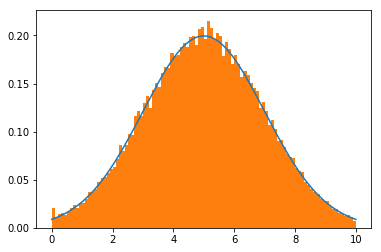

In [328]:
CDF = Simpsons_method(normal_dist,0,10,5,2,.001)
#print CDF
#x,y = zip(*CDF)
#print(x,y)
#plt.plot(x,y)

inverses = []
for i in range(100000): 
    x = random()
    #print(CDF)
    inverse = find_inverse(CDF,x)
    if type(inverse) != str:
        inverses.append(inverse)

plt.hist(inverses,bins=np.arange(min(inverses),max(inverses) + .1,.1),normed = True)
#print "CDF^-1$(x) guess: ", inverse
#print "x: ", x
#print "CDF(x): ", CDF

In [264]:
CDF[1]

(9.990999099909992, 0.9874025887994902)

# That Part Was Gross. Now let's do $e^{-x}$,and let's  do it cleanly. 

Okeydoke so $\textrm{CDF}(x) = \int_a^b e^{-x}dx =  -e^{-x}$. so $[\textrm{CDF}(0),\textrm{CDF}(5)] = [-1,-\frac{1}{e^5}]$. Also $\textrm{CDF}^{-1}(x) = -\ln(-x)$.

First Method:



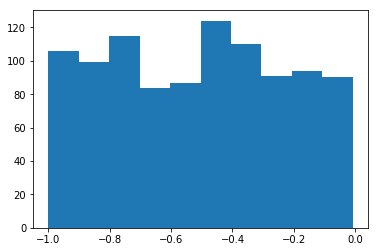

In [341]:
gen_uniform_histogram(1000,-1,-1/exp(5))

In [368]:
from math import log

def decay_cdf_inverse(x):
    
    return -log(-x)

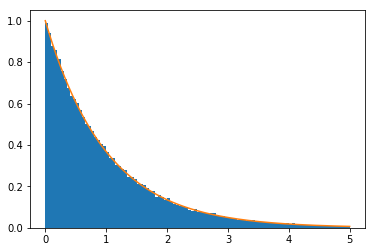

In [369]:
y_samples = gen_uniform_samples(100000,-1,-1/exp(5))
inverses = [decay_cdf_inverse(y) for y in y_samples]
plt.hist(inverses,100,normed = True)
x_values = np.linspace(0,5,1000)
y_values = [exp(-x) for x in x_values]
plt.plot(x_values,y_values)

Second Method:

In [388]:
def gen_dist_ARmethod(N,lower,upper,f):
    
    ensemble = []
    x_samples = gen_uniform_samples(N,lower,upper)
    y_samples = gen_uniform_samples(N,lower,upper)
    samples = zip(x_samples,y_samples)
    #print(samples)
    for index,(x,y) in enumerate(samples):
        if y <= f(x):
            ensemble.append(x)
               
    return ensemble


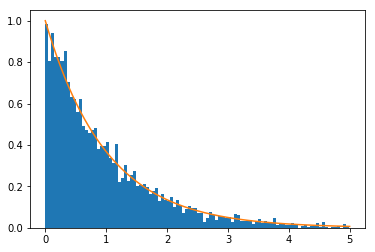

In [394]:
ensemble = gen_dist_ARmethod(100000,0,5,lambda x: exp(-x))
plt.hist(ensemble,100,normed = True)
plt.plot(x_values,y_values)